## Data Description

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import pearsonr
%matplotlib inline

In [200]:
core = pd.read_excel("Inflation.xls", skiprows=2,skipfooter=4)
#core.columns = ["Date 01/2006-10/2019", "SEESA compared to the same month of the previous year", 
#                "SEESA compared to the previous month", "SE compared to the same month of the previous year", 
#                "SE compared to the previous month", "2006-2019 CPI compared to the same month of the previous year",
#               "2006-2019 CPI compared to the previous month"]
core.columns = ["Date", "SEESA Year", 
                "SEESA Month", "SE Year", 
                "SE Month", "CPI Year",
               "CPI Month"]
core

,Date,SEESA Year,SEESA Month,SE Year,SE Month,CPI Year,CPI Month
0,2006/1,98.594810,100.291715,98.743545,100.288545,97.026080,102.479797
1,2006/2,99.083378,100.057609,99.101892,99.904263,97.918800,100.248507
2,2006/3,99.604120,100.366690,99.447619,100.198904,98.939609,100.090708
3,2006/4,101.191824,100.746102,100.872023,100.556315,100.122466,100.284364
4,2006/5,102.216325,100.337057,101.712238,100.210270,102.426835,102.403234
5,2006/6,102.813808,99.893687,102.153860,99.885230,102.658466,98.805613
6,2006/7,104.246790,100.763181,103.540027,100.776885,106.770828,99.319441
7,2006/8,104.121318,99.764473,103.110498,99.770783,107.245499,99.057466
8,2006/9,103.645275,100.144792,102.942868,100.174699,105.884841,99.652123
9,2006/10,103.354734,100.002741,102.721277,100.008653,105.977553,100.178763


In [201]:
descr = core.describe()
skew = np.array(core.skew()).reshape(1,6)
kurtosis = np.array(core.kurtosis()).reshape(1,6)

descr=descr.append(pd.DataFrame(skew, columns = descr.columns, index=['skewness']))
descr=descr.append(pd.DataFrame(kurtosis, columns = descr.columns, index=['kurtosis']))
descr

,SEESA Year,SEESA Month,SE Year,SE Month,CPI Year,CPI Month
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,104.234676,100.345360,103.451914,100.274207,103.917648,100.317140
std,3.726841,0.623472,2.767560,0.389287,3.324173,1.329684
min,97.593644,98.558642,98.197633,99.490879,97.026080,96.845402
25%,101.696096,100.002847,101.401061,100.003866,101.638942,99.541502
50%,104.080395,100.235699,103.648620,100.223978,103.518465,100.205519
75%,106.589856,100.552860,105.619004,100.505989,105.957838,101.168393
max,115.321624,103.574953,108.709100,101.723247,111.546839,103.563135
skewness,0.546791,1.679799,-0.125628,0.695115,0.320565,0.035798
kurtosis,0.605125,6.137235,-0.883910,0.908520,-0.440908,0.002098


C:\Users\Lenovo\Anaconda32018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


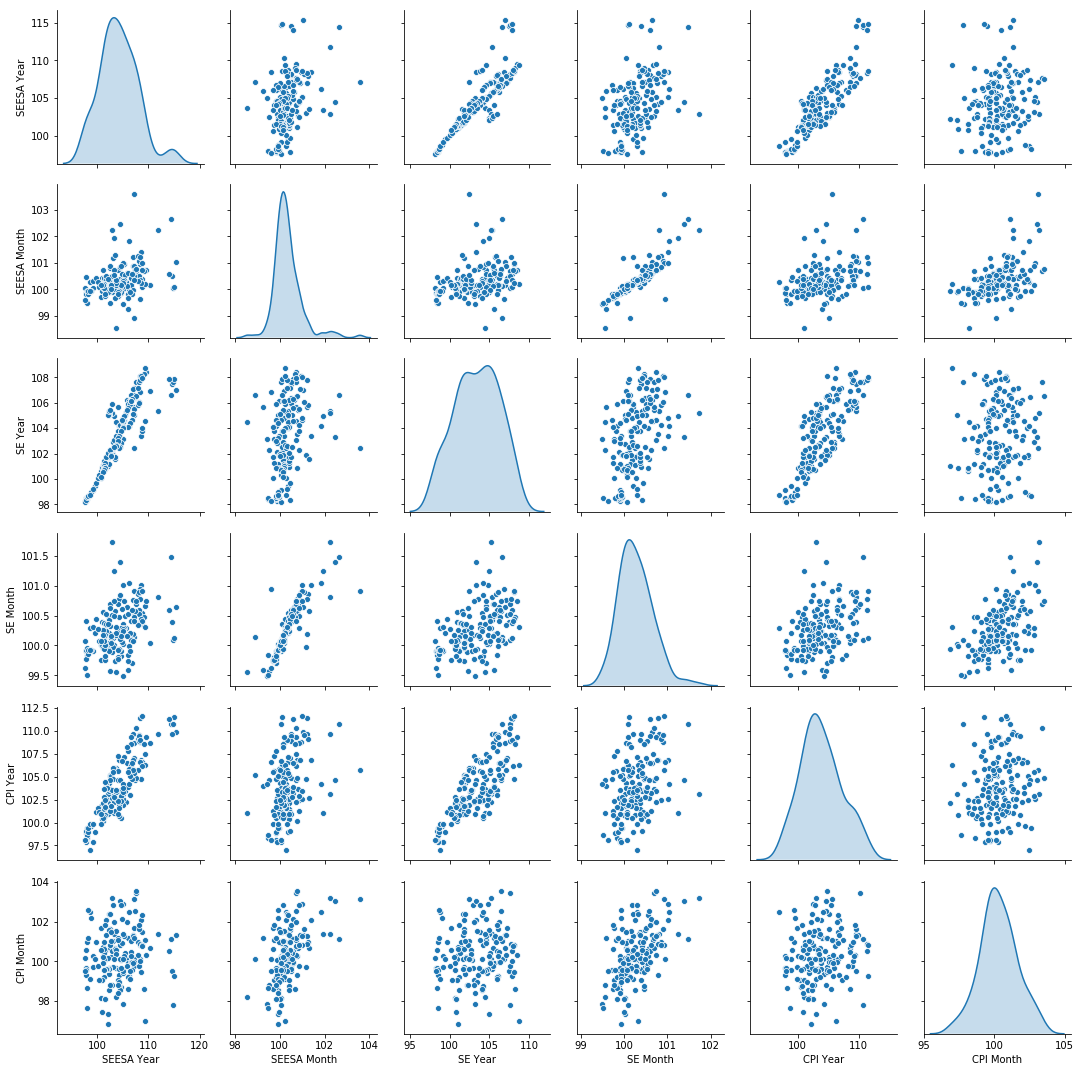

In [202]:
distributions=sns.pairplot(core,diag_kind="kde")

C:\Users\Lenovo\Anaconda32018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


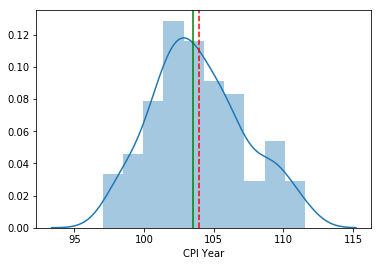

In [203]:
mean=np.mean(core["CPI Year"])
median=np.median(core["CPI Year"])
sns.distplot(core["CPI Year"])
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')


C:\Users\Lenovo\Anaconda32018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


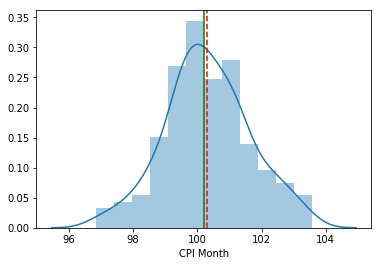

In [204]:
mean_=np.mean(core["CPI Month"])
median_=np.median(core["CPI Month"])
sns.distplot(core["CPI Month"])
plt.axvline(mean_, color='r', linestyle='--')
plt.axvline(median_, color='g', linestyle='-')


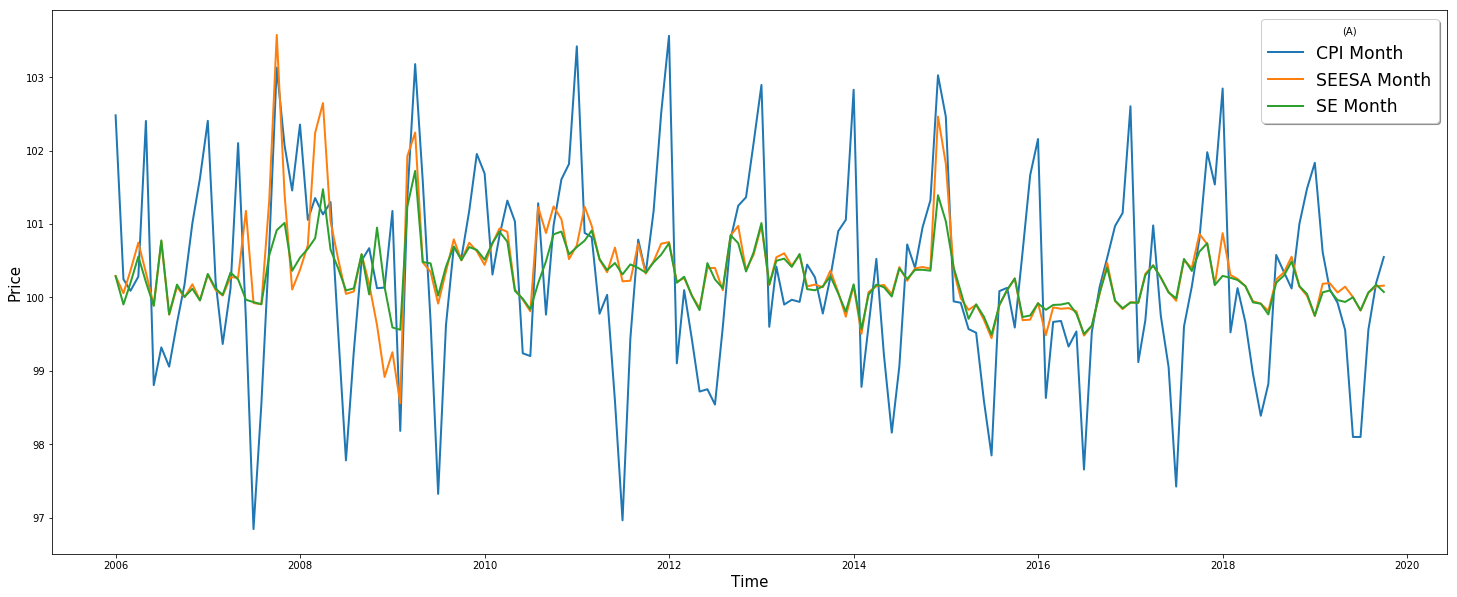

In [205]:
ts_1 = core[["Date", "CPI Month", "SEESA Month","SE Month"]]
_2datetime = lambda x: datetime.strptime(x, '%Y/%m')
ts_1 = ts_1.set_index('Date')
ts_1.index = ts_1.index.map(_2datetime)
fig = plt.figure(figsize=(25,10))
plt.xlabel('Time',size=15)
plt.ylabel('Price',size=15)
plt.plot(ts_1,lw=2)
plt.legend(ts_1.columns,title= "(A)", fontsize='xx-large',shadow = True
           )

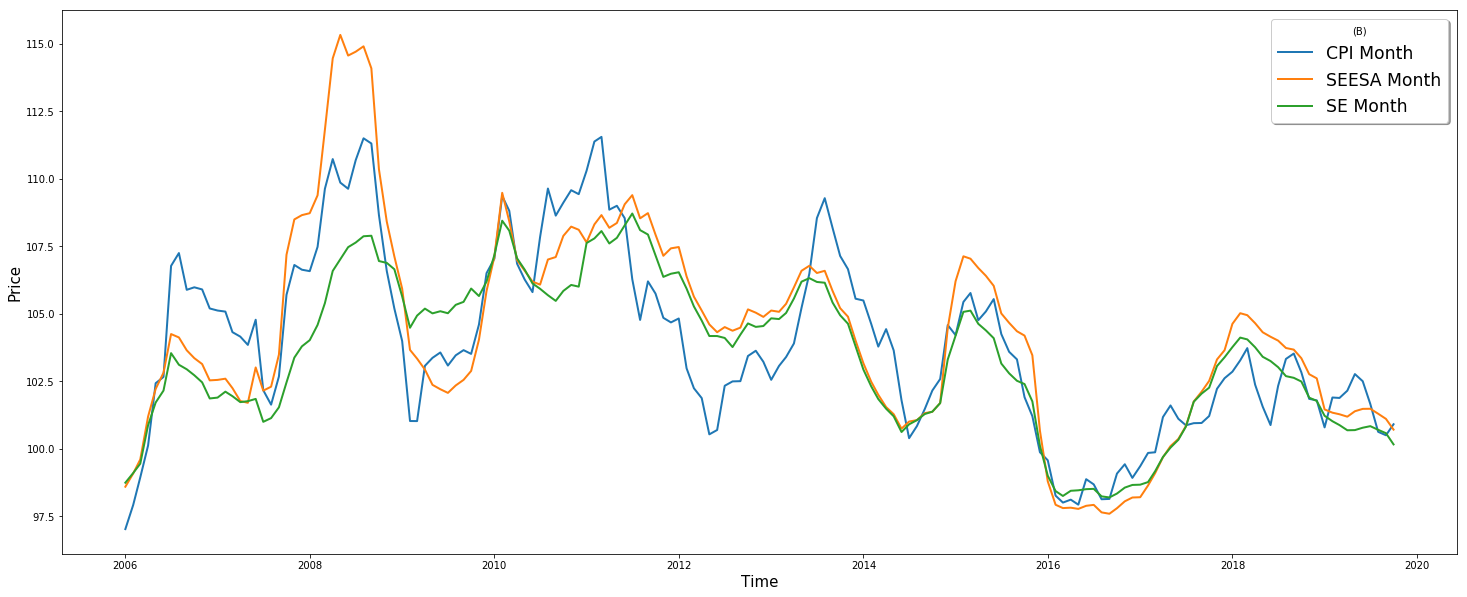

In [206]:
ts_2 = core[["Date", "CPI Year", "SEESA Year","SE Year"]]
_2datetime = lambda y: datetime.strptime(y, '%Y/%m')
ts_2 = ts_2.set_index('Date')
ts_2.index = ts_2.index.map(_2datetime)
fig = plt.figure(figsize=(25,10))
plt.xlabel('Time',size=15)
plt.ylabel('Price',size=15)
plt.plot(ts_2,lw=2)
plt.legend(ts_1.columns, title='(B)', fontsize='xx-large',shadow = True
           )

In [207]:
#define function for ADF test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(ts_1['CPI Month'])
adf_test(ts_2['CPI Year'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.652045
p-value                          0.082710
#Lags Used                      12.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.448773
p-value                          0.558683
#Lags Used                      14.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


# KALMAN FILTER

In [243]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(s[0], s[1])

def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)


In [248]:
process_var = .133
measur_var = .794

x = gaussian(np.mean(ts_1['CPI Month'].values), np.std(ts_1['CPI Month'].values)) # initial state

process_model = gaussian(0., process_var**2)
N = ts_1.shape[0]
ps = []
Estimates_month = []

for z in ts_1['CPI Month'].values:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, measur_var**2))

    # save for latter plotting
    Estimates_month.append(x.mean)
    ps.append(x.var)    

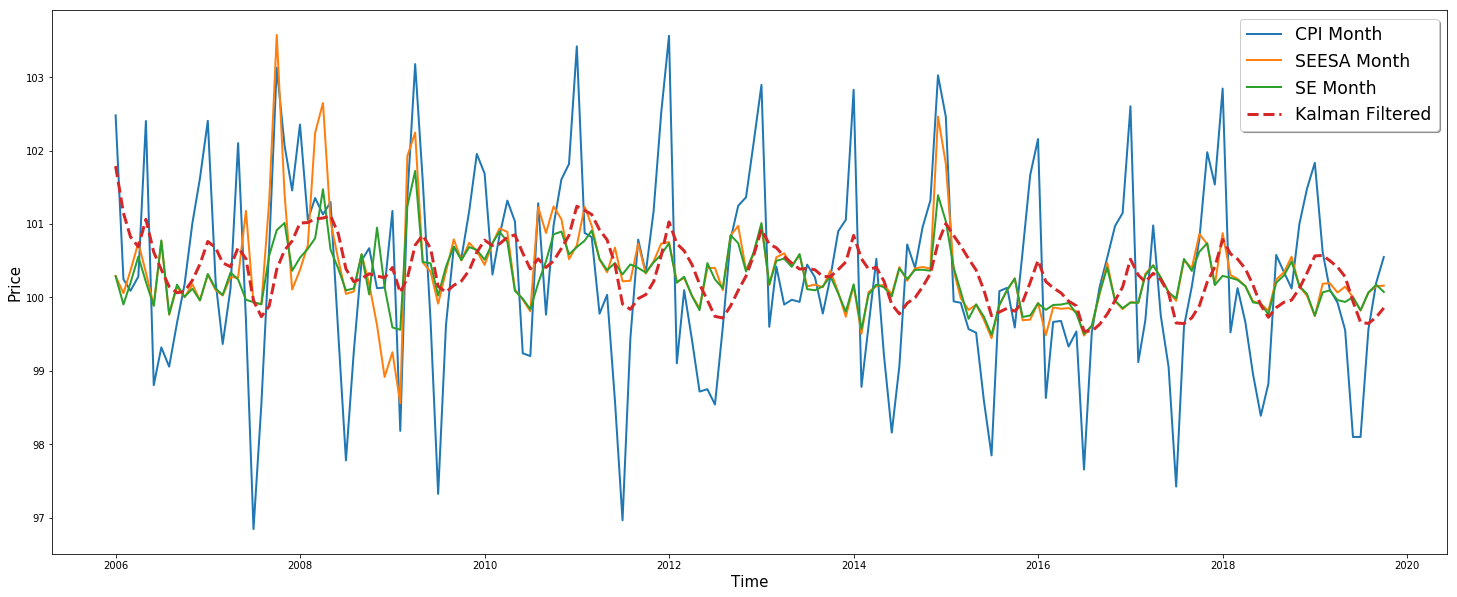

In [249]:
ts_1 = core[["Date", "CPI Month", "SEESA Month","SE Month"]]
_2datetime = lambda y: datetime.strptime(y, '%Y/%m')
ts_1 = ts_1.set_index('Date')
ts_1.index = ts_1.index.map(_2datetime)
fig = plt.figure(figsize=(25,10))
plt.xlabel('Time',size=15)
plt.ylabel('Price',size=15)
plt.plot(ts_1,lw=2)
plt.plot(ts_1.index, Estimates_month, lw=3, ls='--')
plt.legend(list(ts_1.columns)+['Kalman Filtered'], fontsize='xx-large',shadow = True
           )

#plt.legend(Estimates_month, fontsize='xx-large',shadow = True
#           )


In [250]:
rmse1 = sqrt(mean_squared_error(ts_1["SEESA Month"], Estimates_month))
rmse2 = sqrt(mean_squared_error(ts_1["SE Month"], Estimates_month))

In [251]:
print(rmse1,rmse2)

0.6080274277474096 0.44563856780018263


# Correlation between Monetary Aggregates

In [226]:
agg = pd.read_excel("Agg.xlsx")
na=[]
for i in agg.columns:
    na.append(agg[i].isnull().values.ravel().sum())
    if max(na)>=35:
        agg.drop(agg.columns[[np.argmax(na)]],1,inplace=True)
        del na[np.argmax(na)]

print("Missing Values =", na, "\nNumber of columns =", len(na))
print("Total sum of Na's =", agg.isnull().values.ravel().sum())
print("Dataframe Shape =", agg.shape)
agg.columns=['Date','AMD Deposits', 'USD Deposits', 'AMD Credits', 'USD Credits', 'REPO', 'Bank Deposits', 'Cash outside the CB',
           'Money Base','Bank Reserves (AMD)','Other accounts', 'Other accounts (AMD)','Other accounts (exc.AMD)',
            'AMD On-demand Deposits', 'AMD Other Deposits', 'USD On-Demand Deposits', 'USD Other Deposits', 'Reverse REPO', 
           'Refinancing Rate']
agg.head()

Missing Values = [0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 0, 4] 
Number of columns = 19
Total sum of Na's = 27
Dataframe Shape = (166, 19)


,Date,AMD Deposits,USD Deposits,AMD Credits,USD Credits,REPO,Bank Deposits,Cash outside the CB,Money Base,Bank Reserves (AMD),Other accounts,Other accounts (AMD),Other accounts (exc.AMD),AMD On-demand Deposits,AMD Other Deposits,USD On-Demand Deposits,USD Other Deposits,Reverse REPO,Refinancing Rate
0,2006-01-31,6.41,4.59,17.09,17.02,0.00,3601.00,142257.00,187391.00,22418.00,1064.00,1052.00,12.67,52861.73,22193.15,63976.81,82818.18,591.17,3.5
1,2006-02-28,5.93,4.83,17.14,18.07,0.00,1250.14,143056.35,187061.18,22694.12,651.90,613.11,38.79,53755.66,23064.07,59455.35,83754.91,2061.72,4.0
2,2006-03-31,5.17,3.63,16.51,17.85,0.00,1300.07,141265.63,189091.16,22425.29,754.80,642.70,112.10,55834.81,23815.84,66926.22,79833.02,0.00,4.0
3,2006-04-30,5.57,4.69,16.29,18.22,1631.06,0.00,143454.43,184111.99,19230.17,797.56,613.37,184.19,55565.62,23538.39,67669.21,76525.53,512.72,4.0
4,2006-05-31,6.17,4.68,16.52,18.37,3719.65,0.00,145795.01,184868.88,17172.65,750.88,611.25,139.63,56677.44,22920.27,67118.27,74641.11,0.00,4.0


In [227]:
agg = agg.interpolate(method ='spline', order=3)
agg.shape

C:\Users\Lenovo\Anaconda32018\lib\site-packages\scipy\interpolate\fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


(166, 19)

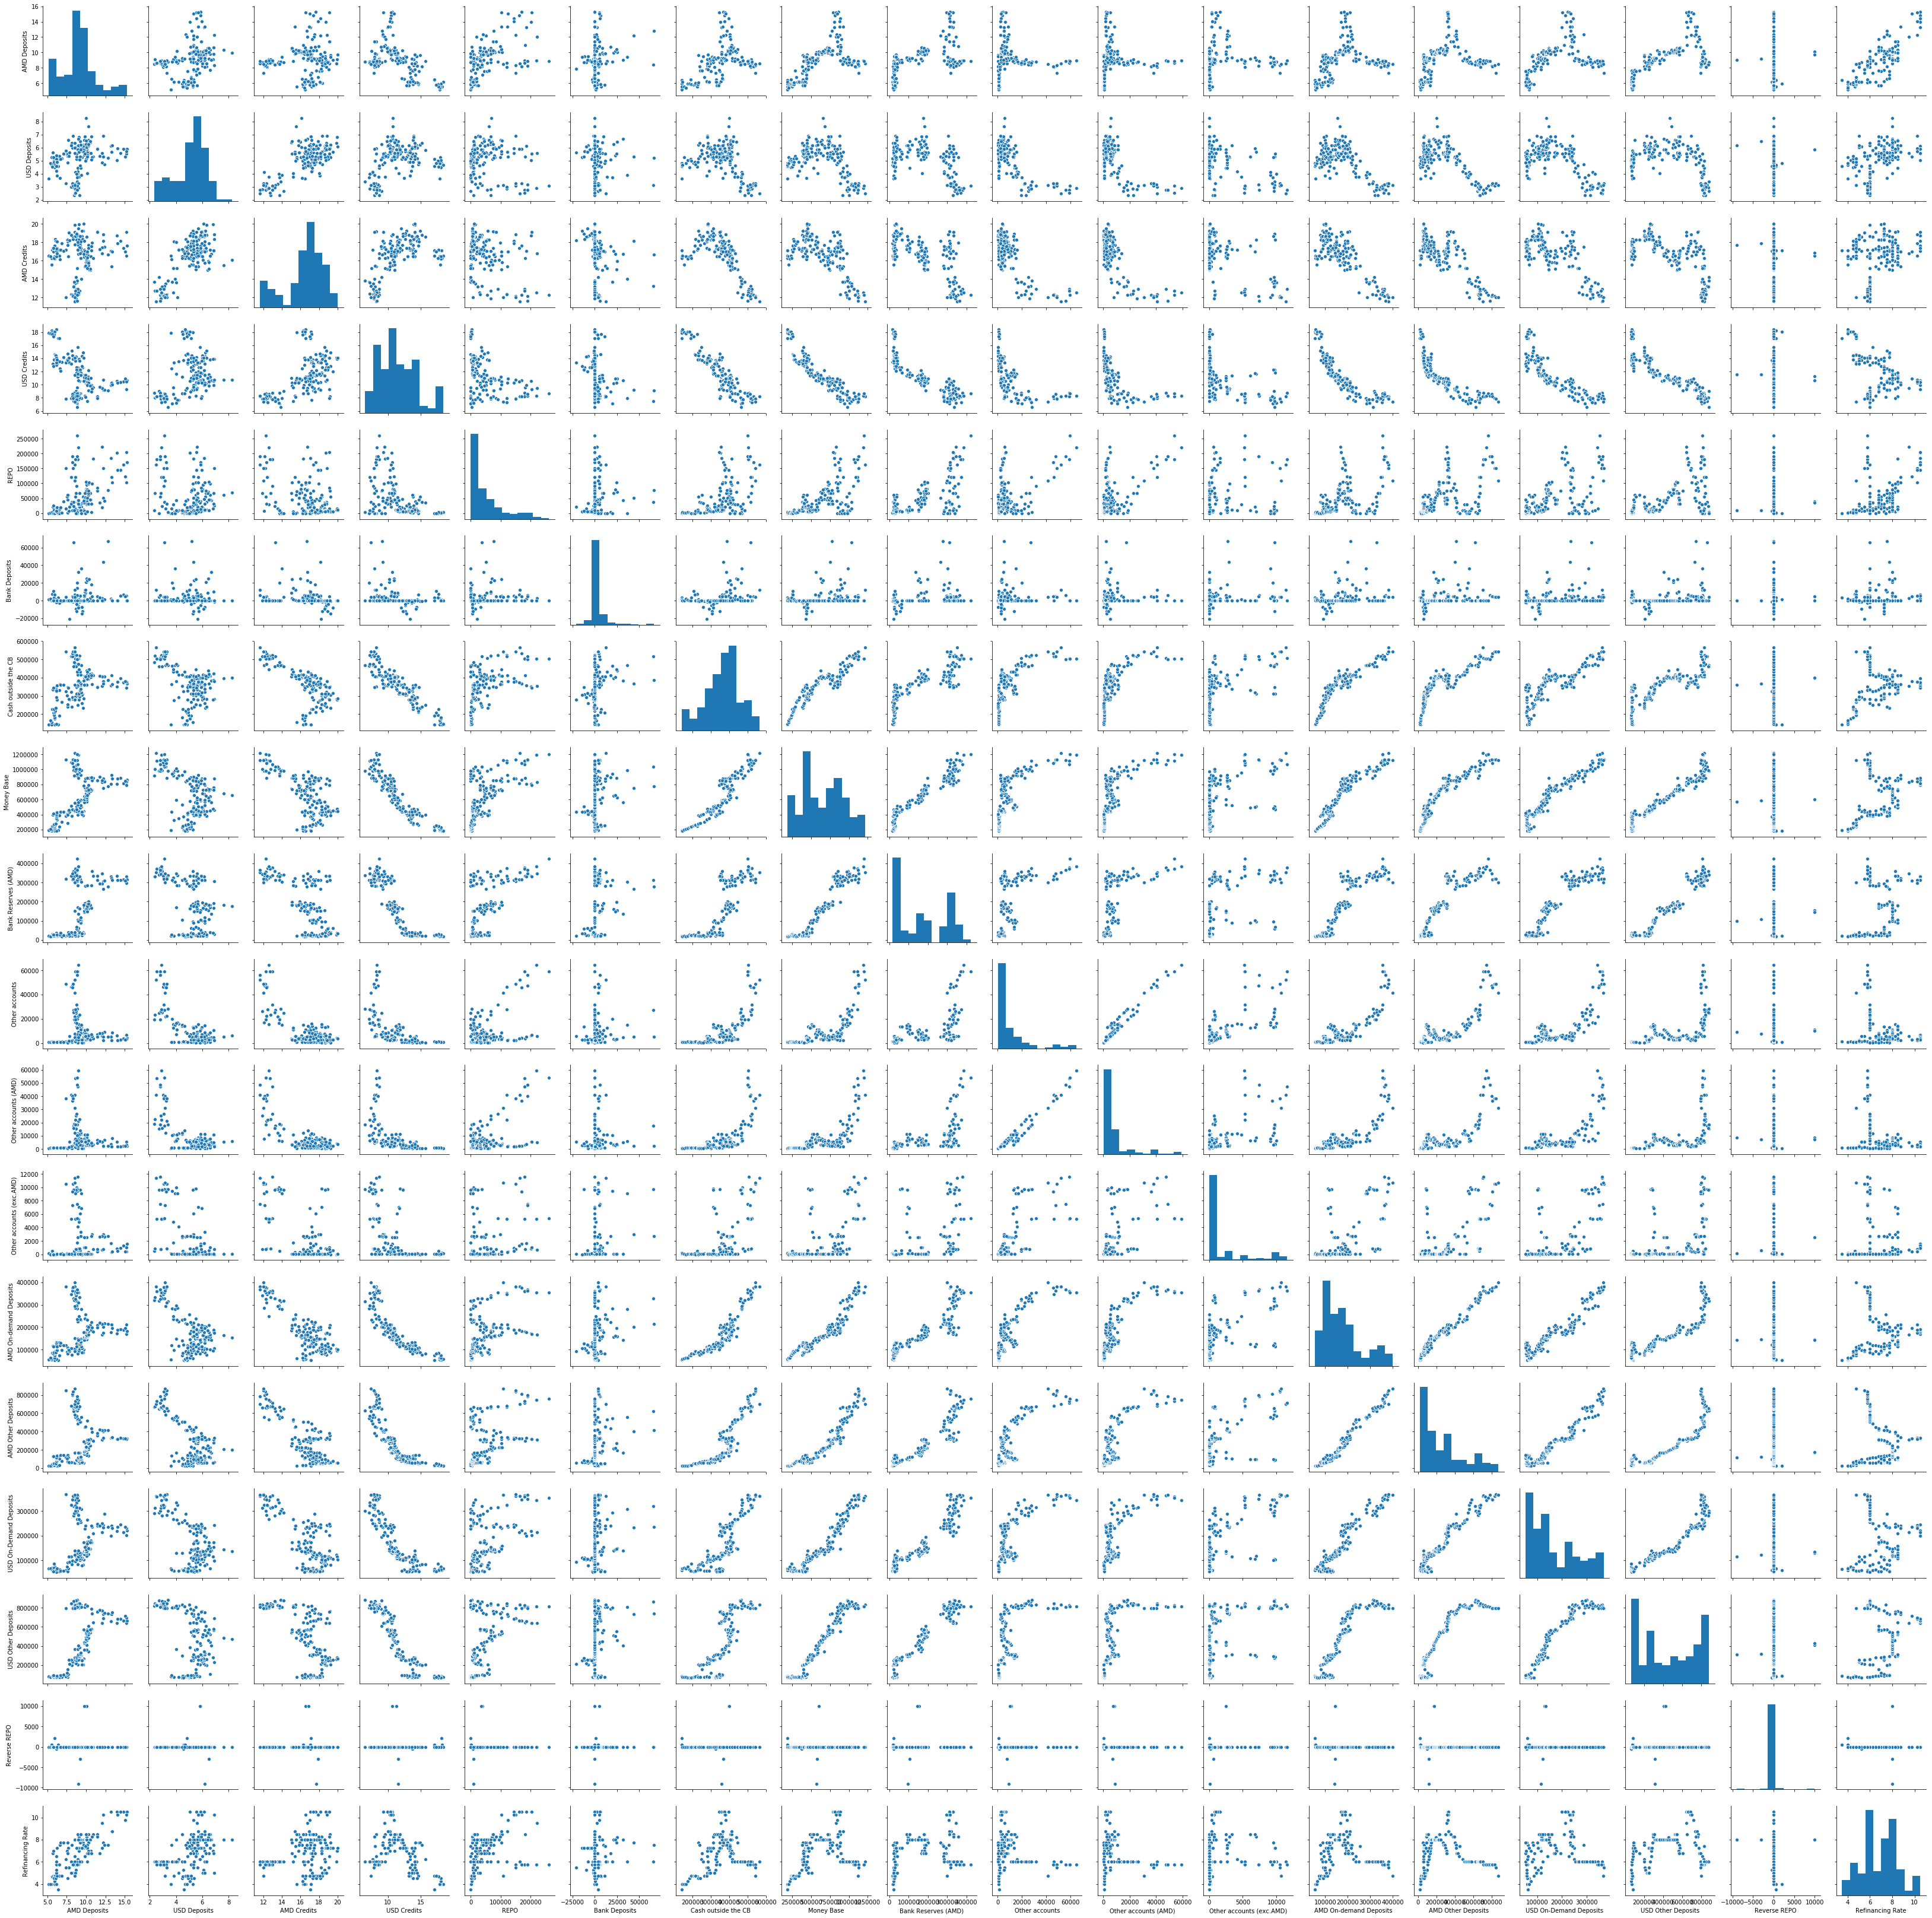

In [228]:
sns.pairplot(agg)

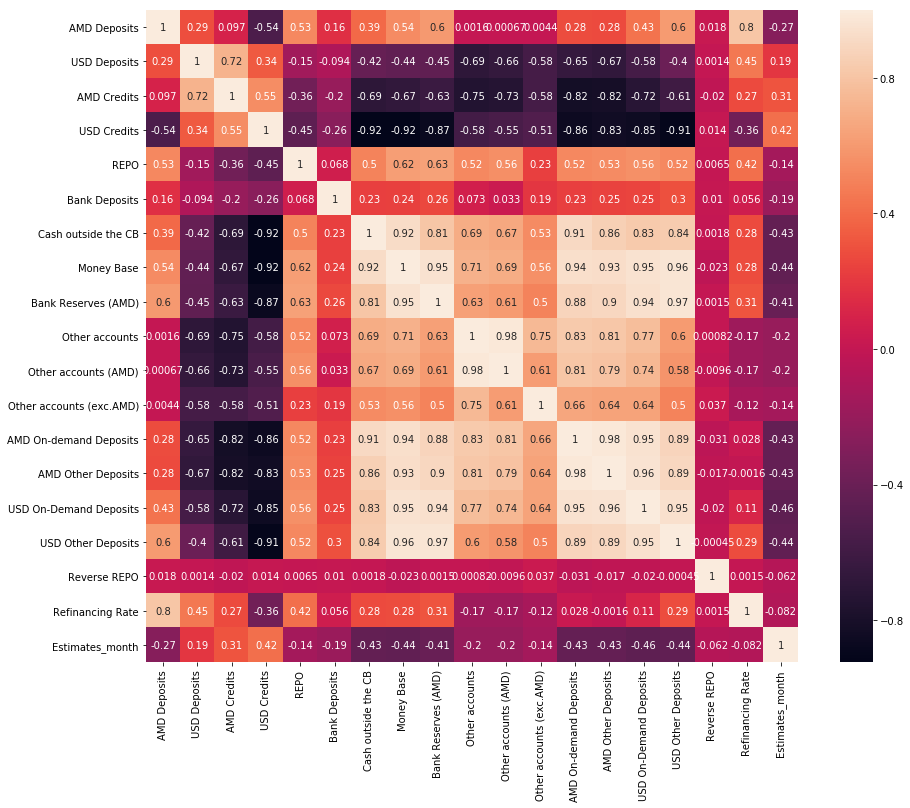

In [252]:
Est=pd.DataFrame(Estimates_month)
Est.columns=["Estimates_month"]
cordf=pd.concat([agg.iloc[:,1:], Est], axis=1)
factors = cordf.columns
corrmat = cordf[factors].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, annot=True, square=True)

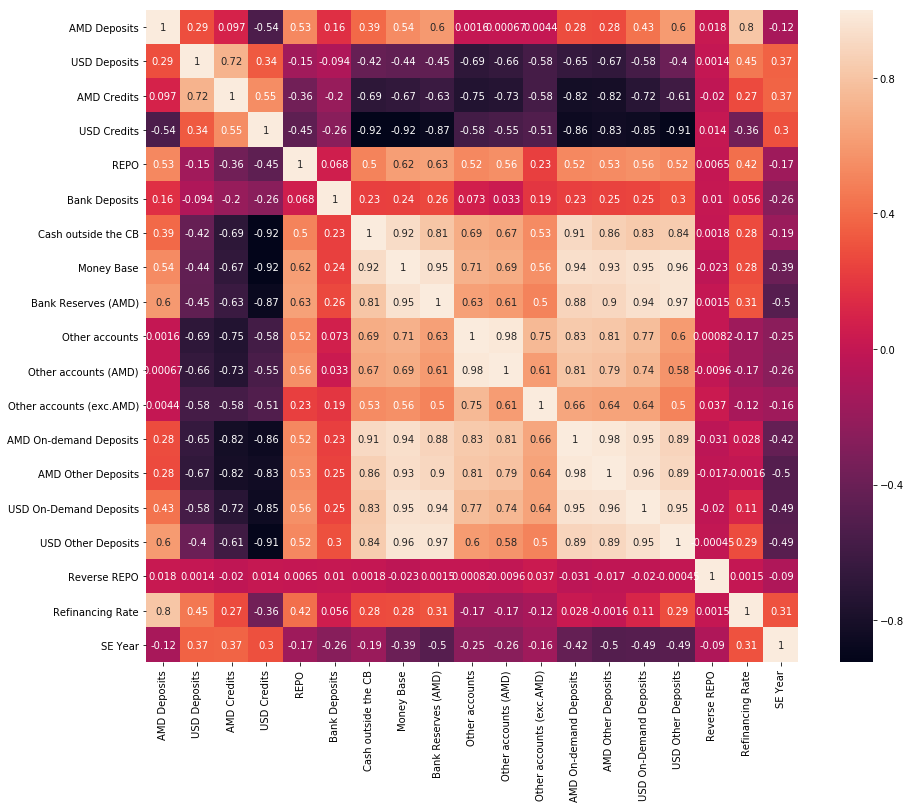

In [253]:
ts = core[["SE Year"]]
cordf=pd.concat([agg.iloc[:,1:], ts], axis=1)
factors = cordf.columns
corrmat = cordf[factors].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, annot=True, square=True)